### Student Information
Name:林彥寬

Student ID:114232505

GitHub ID:brandonlin991118

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [1]:
### Begin Assignment Here
# Phase 1 (NEW dataset) — Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

pd.set_option("display.max_colwidth", 140)
pd.set_option("display.max_rows", 30)


In [2]:
# Load CSV (adjust path if yours differs)
DATA_PATH = Path("newdataset") / "Reddit-stock-sentiment.csv"
assert DATA_PATH.exists(), f"Can't find file: {DATA_PATH.resolve()}"

df_raw = pd.read_csv(DATA_PATH)
df_raw.head(3), list(df_raw.columns)


(      type             datetime  post_id       subreddit  \
 0  comment  2025-04-11 17:29:56  mmli62w  wallstreetbets   
 1  comment   2025-04-12 1:12:19  mmnu7v9  wallstreetbets   
 2  comment  2025-04-10 15:09:41  mmeevio     StockMarket   
 
                                                                                                                                     title  \
 0                                                                                         Retardation is on the menu boys! WSB is so back   
 1                                     Retail giant TARGET has now declined for 10 consecutive weeks, its longest losing streak in history   
 2  How do you feel about a sitting president making $415M in one day after pumping his own stock with social media and a policy decision?   
 
                  author  \
 0          StickyTip420   
 1  Comfortable-Dog-8437   
 2          Btankersly66   
 
                                                                      

In [3]:
# Pick best candidate columns for text/label (robust to naming)
def pick(colnames, *candidates):
    low = {c.lower(): c for c in colnames}
    for c in candidates:
        if c.lower() in low:
            return low[c.lower()]
    return None

text_col  = pick(df_raw.columns, "text", "body", "content", "selftext", "title", "message")
label_col = pick(df_raw.columns, "label", "sentiment", "target", "polarity", "y")
if text_col is None or label_col is None:
    raise ValueError(f"Could not locate text/label columns in {list(df_raw.columns)}")

X = df_raw[[text_col, label_col]].rename(columns={text_col:"text", label_col:"label"}).copy()

# Basic cleaning
X["text"] = X["text"].astype(str).str.strip()
X = X.replace({"text": {"": np.nan, "nan": np.nan}})
X = X.dropna(subset=["text", "label"]).copy()

# Normalize labels to {-1, 0, 1}
label_map = {
    "negative": -1.0, "neg": -1.0, -1: -1.0, "-1": -1.0,
    "neutral":  0.0,  "neu":  0.0,   0:  0.0,  "0":  0.0,
    "positive":  1.0, "pos":  1.0,   1:  1.0,  "1":  1.0,
}
def to_label(v):
    if pd.isna(v): return np.nan
    s = str(v).strip().lower()
    return label_map.get(v, label_map.get(s, np.nan))

X["category"] = X["label"].apply(to_label)
X = X.dropna(subset=["category"]).copy()
X["category"] = X["category"].astype(float)

name_map = {1.0: "pos", 0.0: "neu", -1.0: "neg"}
X["category_name"] = X["category"].map(name_map)

# (Optional) dedupe & short texts removal
X = X[X["text"].str.len() > 3].drop_duplicates(subset=["text","label"]).reset_index(drop=True)

len(X), X.head(3)


(822,
                                                                                                                                         text  \
 0                                                                                                                           Calls on retards   
 1  Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.   
 2                                                                                                          Seeing lots of red in the ticker.   
 
    label  category category_name  
 0   -1.0      -1.0           neg  
 1    0.0       0.0           neu  
 2    0.0       0.0           neu  )

In [5]:
# First 10 records: keep only text and label name
X.loc[:9, ["text", "category_name"]]
# Last 10 records by position
X.iloc[-10:, :][["text", "category_name"]]
# Keep a couple of categories and show 10
cats = ["pos", "neg"]              # change as you wish
X.query("category_name in @cats")[["text","category_name"]].head(10)
# Keyword search (case-insensitive); tweak the regex to taste
mask = X["text"].str.contains(r"\bstock|buy|sell|price\b", case=False, na=False)
X.loc[mask, ["text","category_name"]].head(10)
# Longest posts overall (by token count) — show top 5
X = X.assign(n_tokens = X["text"].str.split().str.len())
X.nlargest(5, "n_tokens")[["text","category_name","n_tokens"]]
# One sampled record per class (quick inspection)
X.groupby("category_name", group_keys=False)\
 .apply(lambda g: g.sample(1, random_state=42))[["text","category_name"]]






C:\Users\Brandon\AppData\Local\Temp\ipykernel_45944\2506623322.py:16: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g.sample(1, random_state=42))[["text","category_name"]]


,text,category_name
530,"China has been preparing for this and this administration lies, is terrible at negotiating, and cannot be trusted with an so-called *dea...",neg
401,Yes!!!,neu
644,Nah he's pretty spot on. Trump supporters are hated globally,pos


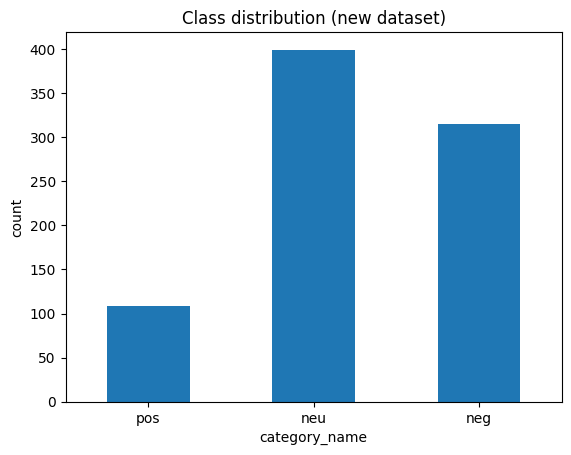

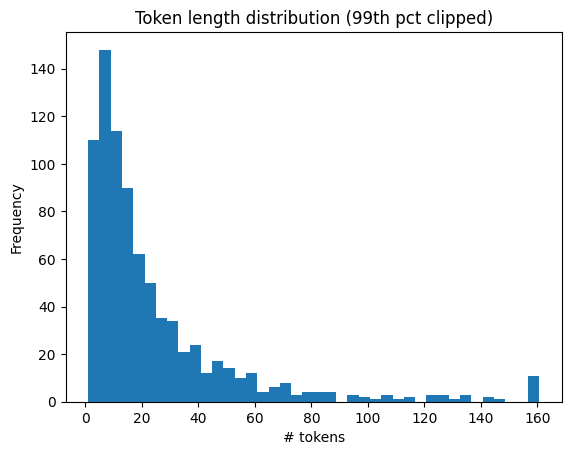

In [6]:
# Class distribution
ax = (X["category_name"].value_counts()
        .reindex(["pos","neu","neg"])
        .fillna(0)
        .plot(kind="bar", rot=0, title="Class distribution (new dataset)"))
ax.set_ylabel("count")
plt.show()
# Token length distribution (clip extreme tail for readability)
ax = X["n_tokens"].clip(upper=X["n_tokens"].quantile(0.99))\
       .plot(kind="hist", bins=40, title="Token length distribution (99th pct clipped)")
ax.set_xlabel("# tokens")
plt.show()



In [8]:
# Missing values per row (should usually be zeros after cleaning)
X.isnull().sum(axis=1).value_counts()
# Duplicates
pd.DataFrame({
    "duplicates_total":[int(X.duplicated().sum())],
    "duplicate_text_only":[int(X.duplicated(subset=['text']).sum())]
})


,duplicates_total,duplicate_text_only
0,0,0


# Phase 2

In [ ]:
### Begin Assignment Here